**Kelas TI-3C**

**Anggota Kelompok:**

**1. Fikril Hadad Ramadhani | 07 | 2141720175**

**2. Hilmi Mughid | 09 | 2141720081**

**3. Mahardhika Bredy Dwi G. S. | 16 | 2141720112**

**4. Ryan Syaputra Arty W. | 23 | 2141720089**

**5. Salwa Labibah Canora | 24 | 2141720261**

**6. Sang Raga Rasendriya W. | 25 | 2141720240**



# 1.   Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).



**Variabel Bebas (Fitur)**
1.   Age (Usia).
2.   Sex (Jenis Kelamin)
3.   BMI (Body Mass Index)
4.   Children (Jumlah Anak)
5.   Smoker (Perokok)
6.   Region (Wilayah)

**Variabel Target**
1. Charges (Biaya Medis Personal)



*   Import library NumPy dan Pandas yang digunakan untuk manipulasi data.
*   Import matplotlib.pyplot dan seaborn untuk memvisualisasikan data.
*   From sklearn.preprocessing Import LabelEncoder, StandardScaler, mengubah variabel kategori menjadi numerik dan untuk melakukan scaling fitur-fitur.
*   Import warnings untuk mengelola pesan peringatan.
*   From sklearn import linear_model untuk pemodelan regresi dan klasifikasi untuk membuat model regresi linear berganda.
*   Import statsmodels.api untuk analisis statistik dan estimasi model statistik.









In [ ]:
# Mengimpor library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
from sklearn import linear_model
import statsmodels.api as sm

* Membaca dataset menggunakan pd.read_csv

In [ ]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'insurance.csv' dalam direktori yang sama)
dataset = pd.read_csv('/content/insurance.csv')



*   Melakukan proses encoding atau pengkodean terhadap beberapa kolom pada dataset menggunakan LabelEncoder.


In [ ]:
le = LabelEncoder() # membuat objek dari LabelEncoder
dataset['sex'] = le.fit_transform(dataset['sex']) # proses encoding
dataset['region'] = le.fit_transform(dataset['region']) # proses encoding
dataset['smoker'] = le.fit_transform(dataset['smoker']) # proses encoding

dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


* Menggunakan pairplot untuk menampilkan hubungan antara variabel bebas dan variabel target dalam bentuk scatter plot

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


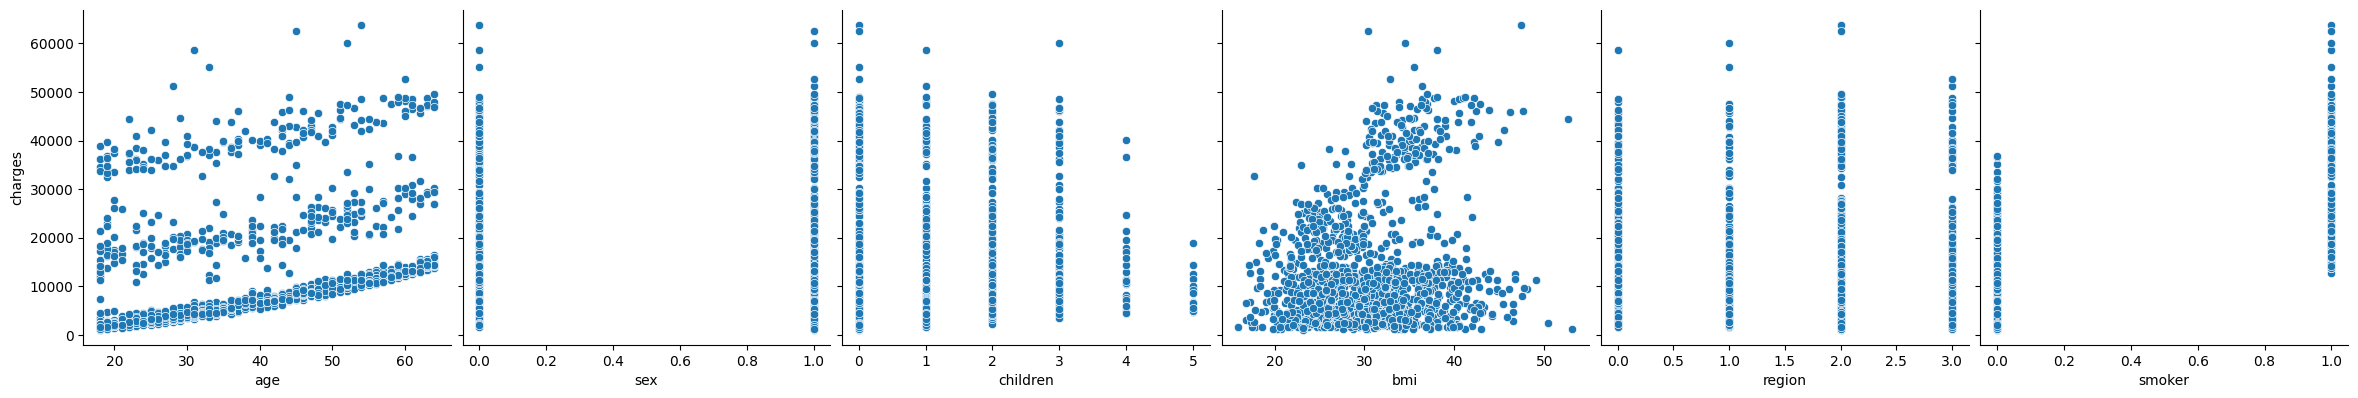

In [ ]:
# visualisasi data dengan pairplot
sns.pairplot(dataset, x_vars=['age', 'sex', 'children', 'bmi', 'region', 'smoker'],
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

* Menggunakan heatmap untuk menampilkan matriks korelasi antara variabel-variabel dalam dataset. Semakin tinggi nilainya, semakin tinggi korelasinya.

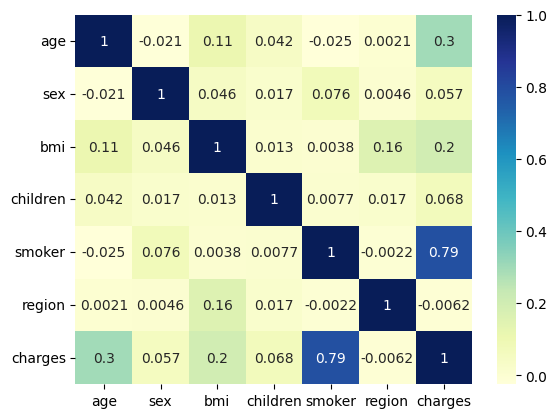

In [ ]:
# Visualisasi korelasi dengan heatmap
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)
plt.show()

* Memisahkan variabel bebas (X) dan variabel target (y).

In [ ]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
x = dataset[['age','smoker']]
y = dataset['charges']



# 2.   Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.



* Membagi data menjadi data latih (70%) dan data uji (30%) menggunakan train_test_split.

In [ ]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)



# 3.   Lakukan feature scaling jika diperlukan.





# 4.   Buat model multiple linear regression menggunakan Scikit-Learn.



*   Melatih model regresi linier menggunakan data latihan



In [ ]:
# Mengimpor kelas LinearRegression dari modul linear_model dalam library sklearn
from sklearn.linear_model import LinearRegression

# Membuat objek mlr dari kelas LinearRegression
mlr = LinearRegression()

# Melatih model regresi linier menggunakan data latihan (x_train dan y_train)
mlr.fit(x_train, y_train)

LinearRegression()

# 5.   Latih model pada data latih dan lakukan prediksi pada data uji.

In [ ]:
# Training model
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()

In [ ]:
y_pred = mlr.predict(x)

# 6.   Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

* Melakukan evaluasi model meliputi MAE, MSE dan R-squared

In [ ]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = mlr.predict(x)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 4196.711823280101
MSE: 40868155.23680598
RMSE: 6392.820601018457
R-squared: 0.7211178946959123
